In [2]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [87]:
#opening database and visualization
crops=pd.read_csv('./data/Production_Crops_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
crops.head(5)

grouped_yield_for_pca=(crops.query('`Element Code` == 5419')
        .query('`Year Code` == 2015')
        .query('`Item Code` >1000')
        .pivot(index='Area',columns='Item',values='Value')
        .fillna(value=0)
        .reset_index()
          )
grouped_yield_for_pca.head()

Item,Area,Cereals (Rice Milled Eqv),"Cereals,Total","Citrus Fruit,Total","Coarse Grain, Total",Fruit Primary,"Pulses,Total","Roots and Tubers,Total","Treenuts,Total",Vegetables Primary
0,Afghanistan,20829.0,21330.0,61111.0,16837.0,89744.0,7443.0,130903.0,15322.0,98165.0
1,Africa,15454.0,16357.0,112521.0,13939.0,89848.0,7310.0,86029.0,5348.0,82285.0
2,Albania,48738.0,48738.0,210307.0,57534.0,214057.0,13829.0,242574.0,43126.0,253610.0
3,Algeria,14001.0,14002.0,222348.0,12672.0,113518.0,10263.0,296099.0,18930.0,205598.0
4,American Samoa,0.0,0.0,0.0,0.0,41179.0,0.0,37647.0,0.0,38033.0


In [88]:
yield_data = grouped_yield_for_pca.drop('Area',axis=1).values

In [89]:
# do that: conda install -c conda-forge umap-learn
import umap

In [90]:
reducer = umap.UMAP()

In [91]:
embedding = reducer.fit_transform(yield_data)
embedding.shape

(245, 2)

In [92]:
def ferti_class(x): #associate a color to each bin of fertilizer
    if x<50 :
        return 0
    elif 50<=x<150:
        return 1
    else:
        return 2

In [93]:
def ferti_class2(x): #associate a color to each bin of fertilizer
    if x<50 :
        return 'low'
    elif 50<=x<150:
        return 'medium'
    else:
        return 'high'

In [94]:
fertilizer_area=pd.read_csv('./data/Environment_Fertilizers_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
fertilizer_area.head(1)

fertilizer_area_2016=(fertilizer_area.query('`Item Code` == (3102)')
    .query('`Year Code` == 2015')
    .query('`Area Code` <300')
    .sort_values('Value', ascending=False)
)

In [95]:
embedding2=pd.DataFrame(embedding)
embedding2=pd.merge(embedding2,grouped_yield_for_pca['Area'], left_index=True, right_index=True)
embedding2=pd.merge(embedding2,fertilizer_area_2016.loc[:,['Area','Value']],left_on='Area',right_on='Area')
embedding2['ferti_class']=embedding2.Value.apply(ferti_class)
embedding2['ferti_class2']=embedding2.Value.apply(ferti_class2)
embedding2.head()

,0,1,Area,Value,ferti_class,ferti_class2
0,3.005647,4.333471,Afghanistan,11.71,0,low
1,-1.355718,0.470732,Albania,52.87,1,medium
2,-0.950571,0.467607,Algeria,11.83,0,low
3,1.510695,3.810597,Angola,4.91,0,low
4,4.806991,4.407911,Antigua and Barbuda,1.70,0,low


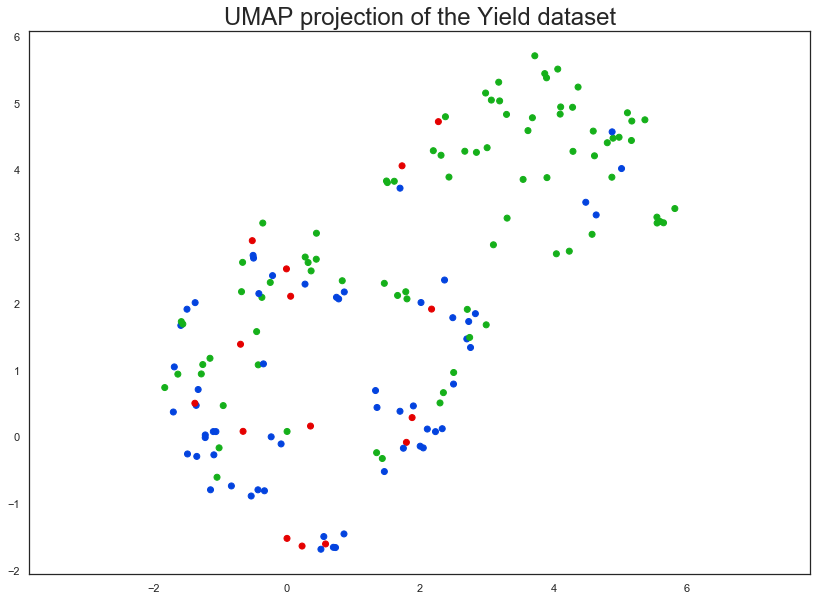

In [96]:
plt.scatter(embedding2[0], embedding2[1], c=[sns.xkcd_palette(colors)[x] for x in embedding2.ferti_class.values])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Yield dataset', fontsize=24);

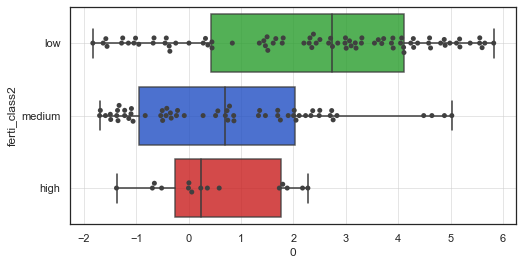

In [97]:
fig = plt.figure(figsize = (8,4))
#sns.palplot(sns.cubehelix_palette(3))
colors = ["green", "blue", "red"]
ax = sns.boxplot(x=embedding2[0], y='ferti_class2', data=embedding2, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax = sns.swarmplot(x=embedding2[0], y='ferti_class2', data=embedding2, color=".25")
ax.grid(alpha=0.5)

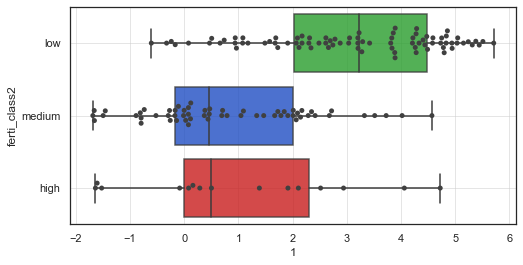

In [98]:
fig = plt.figure(figsize = (8,4))
#sns.palplot(sns.cubehelix_palette(3))
colors = ["green", "blue", "red"]
ax = sns.boxplot(x=embedding2[1], y='ferti_class2', data=embedding2, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax = sns.swarmplot(x=embedding2[1], y='ferti_class2', data=embedding2, color=".25")
ax.grid(alpha=0.5)

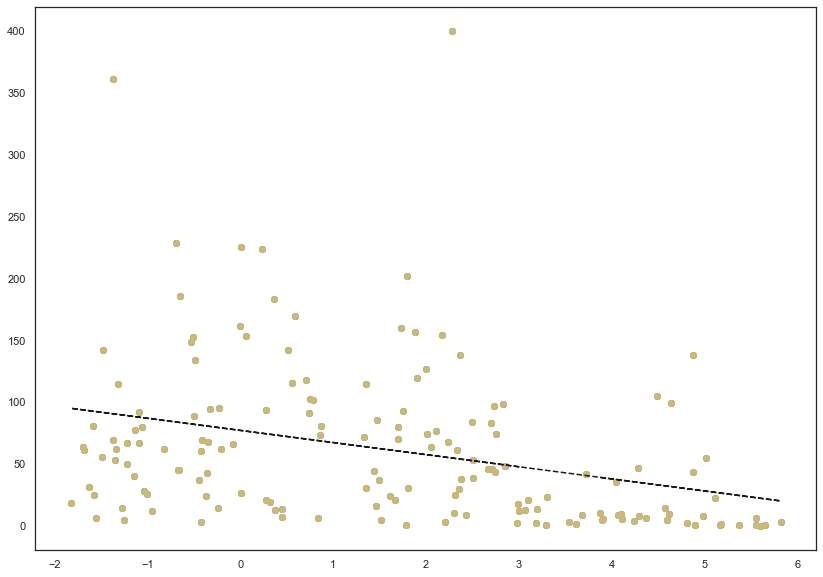

In [103]:
plt.scatter(embedding2[0],embedding2.Value)

coef = np.polyfit(embedding2[0],embedding2.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(embedding2[0],embedding2.Value, 'yo',embedding2[0], poly1d_fn(embedding2[0]), '--k')